# Project: Popular Data Science Questions in Stack Exchange

In this project, we will discuss the best content in regards to Data Science in [Stack Exchange website](https://stackexchange.com/).

## Stack Exchange 

**What kind of questions are welcome on this site?**

On DSSE's help center's [section on questions](https://datascience.stackexchange.com/help/asking) , we can read that we should:

* Avoid subjective questions.
* Ask practical questions about Data Science — there are adequate sites for theoretical questions.
* Ask specific questions.
* Make questions relevant to others.

All of these characteristics, if employed, should be helpful attributes to our goal.

**What, other than questions, does DSSE's home subdivide into?**

In DSSE [home page](https://datascience.stackexchange.com/), we can see there are five sections. 

1. `Questions` — a list of all questions asked;
2. `Tags` — a list of all questions asked;
<img src="tags.png">
3. `Users` — a list of users;
4. `jobs` - relevant jobs post on websites
5. `Unanswered` — a list of unanswered questions;

Users can search in the search bar, choose from recently trending questions, or browse questions by tag. Questions and answers can be voted up or down; the highest rated answers are promoted to the top of the post.

**What information is available in each post?**

Here is an [example](https://datascience.stackexchange.com/questions/74328/chain-function-in-backpropagation) post, we can find:
* For both questions and answers:
 * The posts's score;
 * The posts's title;
 * The posts's author;
 * The posts's body;
* For questions only:
 * How many users have it on their "
 * The last time the question as active;
 * How many times the question was viewed;
 * Related questions;
 * The question's tags;

Stack Exchange provides a public data base for each of its websites. [Here](https://data.stackexchange.com/datascience/query/new)'s a link to query and explore Data Science Stack Exchange's database.

For finding our final goal that which best contents are popular in Data Science section, we will explor the following tables:

* Tags
* TagSynonyms
* Posts
* PostTags

`Tags` immediately lets us know which tags have been used the greatest number of times (see table below). However, Tags does not tell us when the tag was used, so this may include outdated data which does not correspond to the most popular topics in 2019-2020.

`TagSynonyms` tells us which tags have been renamed over time, and when they were renamed.

`Posts` tells us the details about each specific post on DSSE, including any relevant tags, when the post was created, number of comments and views the post received, and its score. This information will help us identify which data science topics are currently in-demand from the community.

`PostTags` tells us the id of a post, as well as the relevant tag for that post.

According to search query on Stack Exchange Data Base, let's see what `Tags` and `Posts` looks like:

**Tags**

<img src="tags10.png" width="600" height="300">

**Posts**

<img src="posts.png" width="600" height="300">

Running a few exploratory queries, leads us to focus our efforts on Posts table. For examples, the Tags table looked very promising as it tells us how many times each tag was used, but there's no way to tell just from this if the interest in these tags is recent or a thing from the past.

In Posts table, the PostTypeId tell us what category each post belongs to:
1. Question
2. Answer
3. Wiki
4. TagWikiExcerpt
5. TagWiki
6. ModeratorNomination
7. WikiPlaceholder
8. PrivilegeWiki

we will focus on PostTypeId=1(`Question`) because each question have relative tags which help us find most popular question in community. In addition, Since we're only interested in recent posts, we'll limit our analysis to the posts of 2019. (At the time of writing it is early 2020), so we select data between '`2019-01-01 00:00:00`' and '`2020-01-01 00:00:00`'.

## Exploring Data

In [1]:
## import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
## read data from file

questions=pd.read_csv('2019_questions.csv', parse_dates=['CreationDate'])
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [3]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             8839 non-null   int64         
 1   CreationDate   8839 non-null   datetime64[ns]
 2   Score          8839 non-null   int64         
 3   ViewCount      8839 non-null   int64         
 4   Tags           8839 non-null   object        
 5   AnswerCount    8839 non-null   int64         
 6   FavoriteCount  1407 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


We can find the dataframe has 7 colomns and 8839 rows and we also find the `FavoriteCount` column has many missing value. 

## Clean Data


The missing value in `FavoriteCount` means the question was is not present in any users' favorite list, so we can replace the missing values with zero.

In [4]:
## fill missing value
questions.fillna(value={'FavoriteCount': 0}, inplace=True)
questions['FavoriteCount']=questions['FavoriteCount'].astype(int)
questions['FavoriteCount'].isnull().sum()

0

In [5]:
questions.head(10)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,0
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,0
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,0
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,0
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,0
5,44430,2019-01-23 11:13:32,0,283,<fuzzy-logic>,1,0
6,44432,2019-01-23 11:17:46,1,214,<time-series><anomaly-detection><online-learning>,0,1
7,44436,2019-01-23 12:49:39,0,9,<matrix-factorisation>,0,0
8,44437,2019-01-23 13:04:11,0,7,<correlation><naive-bayes-classifier>,0,0
9,44438,2019-01-23 13:16:29,0,584,<machine-learning><python><deep-learning><kera...,1,0


When we focus on `Tags` column, we can find the datatype is object and mutiple tags in this column, we need to modify it to a list. 

In [6]:
## display tags column
questions['Tags'].head()

0                      <machine-learning><data-mining>
1    <machine-learning><regression><linear-regressi...
2         <python><time-series><forecast><forecasting>
3                <machine-learning><scikit-learn><pca>
4             <dataset><bigdata><data><speech-to-text>
Name: Tags, dtype: object

In [7]:
## reformat Tags column
questions['Tags']=questions['Tags'].str.replace('^<|>$','').str.split('><')

In [8]:
questions['Tags'].sample(n=10)

965                     [machine-learning, deep-learning]
5354                                      [deep-learning]
2406                                   [cross-validation]
5725                   [naive-bayes-classifier, homework]
380     [neural-network, feature-selection, feature-en...
6900          [python, neural-network, keras, tensorflow]
6358                                      [nlp, word2vec]
6831                             [dataset, data-cleaning]
2701              [machine-learning, data-mining, metric]
6878                                                [cnn]
Name: Tags, dtype: object

## Analyzing Data

We now focus on determining the most popular tags. We'll do so by considering two different popularity proxies: for each tag we'll count how many times the tag was used, and how many times a question with that tag was viewed.

We could take into account the score, or whether or not a question is part of someone's favorite questions. These are all reasonable options to investigate; but we'll limit the focus of our research to counts and views for now.

### Most used tags

In [9]:
## create tag dictionary
tag_use_count={}

for tags in questions['Tags']:
    for tag in tags:
        if tag in tag_use_count:
            tag_use_count[tag]+=1
        else:
            tag_use_count[tag]=1
tag_use_count

{'machine-learning': 2693,
 'data-mining': 217,
 'regression': 347,
 'linear-regression': 175,
 'regularization': 50,
 'python': 1814,
 'time-series': 466,
 'forecast': 34,
 'forecasting': 85,
 'scikit-learn': 540,
 'pca': 85,
 'dataset': 340,
 'bigdata': 95,
 'data': 213,
 'speech-to-text': 8,
 'fuzzy-logic': 13,
 'anomaly-detection': 92,
 'online-learning': 13,
 'matrix-factorisation': 24,
 'correlation': 80,
 'naive-bayes-classifier': 42,
 'deep-learning': 1220,
 'keras': 935,
 'cnn': 489,
 'theory': 11,
 'gradient-descent': 98,
 'nlp': 493,
 'clustering': 257,
 'feature-extraction': 87,
 'encoding': 54,
 'embeddings': 44,
 'pandas': 354,
 'numpy': 117,
 'decision-trees': 145,
 'accuracy': 89,
 'matlab': 62,
 'reinforcement-learning': 203,
 'q-learning': 37,
 'policy-gradients': 27,
 'neural-network': 1055,
 'image-classification': 211,
 'r': 268,
 'logistic-regression': 154,
 'predictive-modeling': 265,
 'lstm': 402,
 'tensorflow': 584,
 'gpu': 42,
 'data-cleaning': 157,
 'object-d

In [10]:
## transfer tag_count to dataframe

tag_count_df = pd.DataFrame.from_dict(tag_use_count, orient='index')
tag_count_df.rename(columns={0:"Tag_Count"},inplace=True)
tag_count_df.sort_values(by="Tag_Count",ascending=False, inplace=True)
top_20_tags = tag_count_df.head(20)
top_20_tags

,Tag_Count
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493
cnn,489


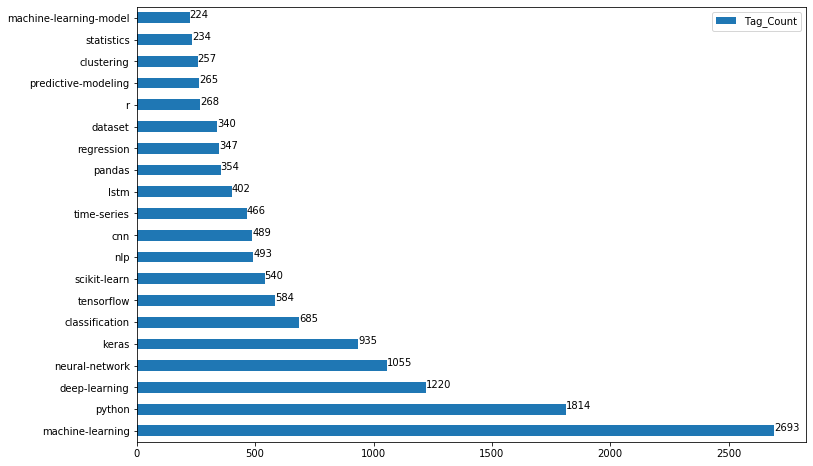

In [11]:
## Visualization of top 10 most used tags in 2019
top_20_tags.plot(kind='barh', figsize=(12,8))
y=[i for i in top_20_tags['Tag_Count']]
for index, value in enumerate(y):
    plt.text(value, index, str(value))


According to Top 20 most used tags bar chart shown above ,we can find:
* `Machine-learning` was by far the most used tag, followed by `python, deep-learning, neural-network, and keras`.
* `Machine-learning` is far more than other labels, even nearly 1,000 times more than the second place.
* If we compare the most popular tags from 2019 with the most popular tags overall on DSSE, the top 5 are nearly identical: `machine-learning, python, neural-network, deep-learning`, and `classification`.

### Most view tags

In [12]:
## find most view tags
tag_view_count={}

for index, row in questions.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag]+=row['ViewCount']
        else:
            tag_view_count[tag]=row['ViewCount']

tag_view_count

{'machine-learning': 388499,
 'data-mining': 31056,
 'regression': 49451,
 'linear-regression': 18978,
 'regularization': 4941,
 'python': 537585,
 'time-series': 64134,
 'forecast': 8153,
 'forecasting': 8797,
 'scikit-learn': 128110,
 'pca': 6387,
 'dataset': 43151,
 'bigdata': 12918,
 'data': 17888,
 'speech-to-text': 281,
 'fuzzy-logic': 1264,
 'anomaly-detection': 10992,
 'online-learning': 1485,
 'matrix-factorisation': 906,
 'correlation': 9403,
 'naive-bayes-classifier': 5734,
 'deep-learning': 233628,
 'keras': 268608,
 'cnn': 70349,
 'theory': 375,
 'gradient-descent': 14837,
 'nlp': 71382,
 'clustering': 33928,
 'feature-extraction': 12795,
 'encoding': 18843,
 'embeddings': 4055,
 'pandas': 201787,
 'numpy': 49767,
 'decision-trees': 20613,
 'accuracy': 15233,
 'matlab': 6603,
 'reinforcement-learning': 20101,
 'q-learning': 3315,
 'policy-gradients': 1429,
 'neural-network': 185367,
 'image-classification': 33238,
 'r': 33684,
 'logistic-regression': 18370,
 'predictive-mo

In [13]:
tag_view_count_df = pd.DataFrame.from_dict(tag_view_count, orient="index")
tag_view_count_df.rename(columns={0: "View_Count"}, inplace=True)
tag_view_count_df.sort_values(by="View_Count", ascending=False, inplace=True)
top_20_views = tag_view_count_df.head(20)
top_20_views

,View_Count
python,537585
machine-learning,388499
keras,268608
deep-learning,233628
pandas,201787
neural-network,185367
scikit-learn,128110
tensorflow,121369
classification,104457
dataframe,89352


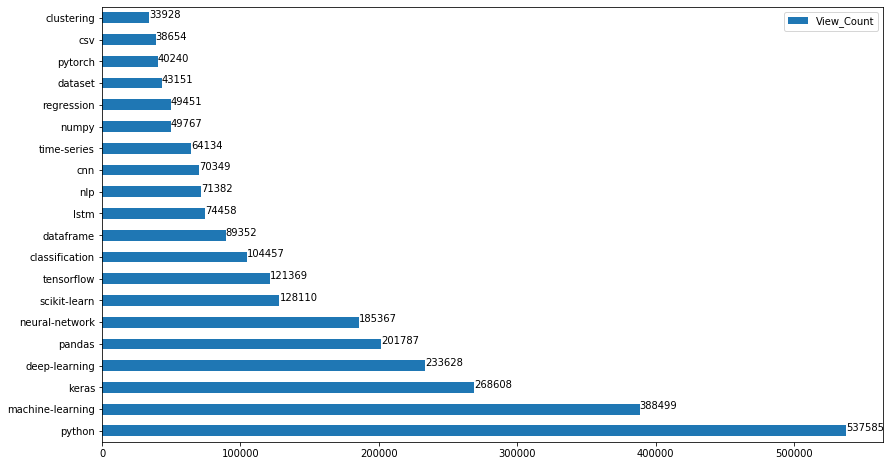

In [14]:
## Visualization of top 10 most viewd tags in 2019
top_20_views.plot(kind='barh', figsize=(14,8))
y1=[i for i in top_20_views['View_Count']]
for index, value in enumerate(y1):
    plt.text(value, index, str(value))

We can find the most viewed tags are python, machine-learning, keras, deep-learning, and pandas. The top two tags are similar to the most used tags chart. we will plot these two chart side by side for clear analysis.

### Comparison of Most Used and Most Viewed Tags

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ac3da10>],
      dtype=object)

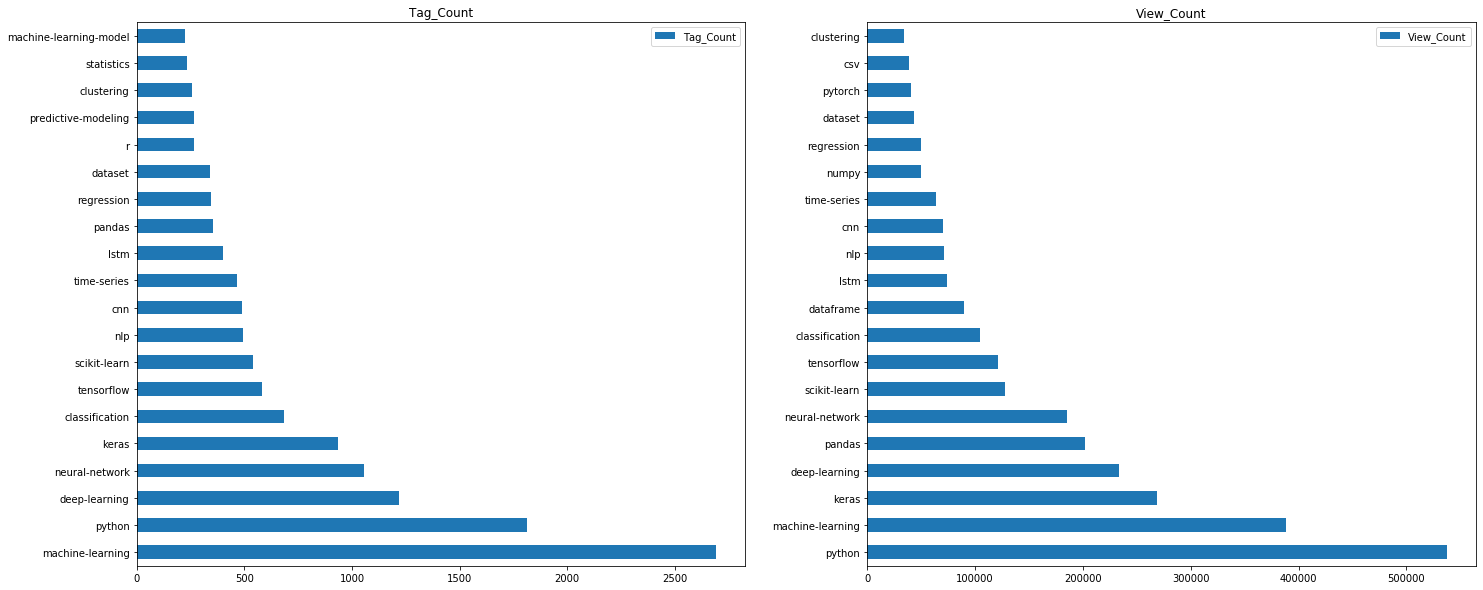

In [15]:

fig,axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches((24, 10))
top_20_tags.plot(kind="barh", ax=axes[0], subplots=True)

top_20_views.plot(kind="barh", ax=axes[1], subplots=True)

What we see from the two graphs above is that there is a pretty clear relationship between subjects that get tagged more often in questions and those that get more views. This makes sense, as a higher volume of tags to questions makes it more likely that a subject will be viewed. It is interesting, however, that Machine Learning is tagged in over 800 more questions than Python, but questions with python were viewed 15,000 more times.



Overall, we know:
* `top_20_tags` is a dataframe that counts how many times each of the top 20 tags was used.
* `top_20_views` is a dataframe that counts how many times each of the top 20 tags was viewed.

Let's see what tags are most used, but not most viewed, vice versa. 

In [16]:
## Create a table to view overlap between most used and most viewed tags
most_used=pd.merge(top_20_tags,top_20_views,how='left', left_index=True, right_index=True)
most_used.columns = ['use_count', 'view_count']
most_used

,use_count,view_count
machine-learning,2693,388499.0
python,1814,537585.0
deep-learning,1220,233628.0
neural-network,1055,185367.0
keras,935,268608.0
classification,685,104457.0
tensorflow,584,121369.0
scikit-learn,540,128110.0
nlp,493,71382.0
cnn,489,70349.0


The tags are most used but not viewd are:
* `machine-learning-model`
* `statistics`
* `predictive-modeling`
* `r`

In [17]:
most_views=pd.merge(top_20_views,top_20_tags,how='left', left_index=True, right_index=True)
most_views.columns = ['view_count','use_count']
most_views

,view_count,use_count
python,537585,1814.0
machine-learning,388499,2693.0
keras,268608,935.0
deep-learning,233628,1220.0
pandas,201787,354.0
neural-network,185367,1055.0
scikit-learn,128110,540.0
tensorflow,121369,584.0
classification,104457,685.0
dataframe,89352,NaN


The tags are most view but not most used:
* `csv`
* `pytorch`
* `dataframe`
* `numpy`

### Relation between tags
Some tags also stand out as being related. For example, `python` is related to `pandas`, as we can find both pythons and pandas in the same country — or better yet, because pandas is a Python library. So by writing about pandas, we can actually simultaneously tackle two tags. In opposite, Other pairs of tags, shouldn't be related at all, like `pandas` and `r`.

In [18]:
## Posts tagged `python` and `pandas`
questions['Tags'].apply(lambda x: True if 'python' in x and 'pandas' in x else False).sum()

244

In [19]:
## Posts tagged `r` and `pandas`
questions['Tags'].apply(lambda x: True if 'r' in x and 'pandas' in x else False).sum()

2

We can find `python` and `pandas` have highly relationship compare `r` and `pandas`.

Next, we will find relationship between different pair tags, which means count how many times each pair appears together. 

In [20]:
## list of tags

all_tags=list(tag_count_df.index)
all_tags

['machine-learning',
 'python',
 'deep-learning',
 'neural-network',
 'keras',
 'classification',
 'tensorflow',
 'scikit-learn',
 'nlp',
 'cnn',
 'time-series',
 'lstm',
 'pandas',
 'regression',
 'dataset',
 'r',
 'predictive-modeling',
 'clustering',
 'statistics',
 'machine-learning-model',
 'data-mining',
 'data',
 'image-classification',
 'feature-selection',
 'reinforcement-learning',
 'data-science-model',
 'pytorch',
 'linear-regression',
 'xgboost',
 'feature-engineering',
 'loss-function',
 'random-forest',
 'data-cleaning',
 'logistic-regression',
 'rnn',
 'training',
 'decision-trees',
 'cross-validation',
 'svm',
 'multiclass-classification',
 'prediction',
 'visualization',
 'natural-language-process',
 'optimization',
 'computer-vision',
 'preprocessing',
 'numpy',
 'word-embeddings',
 'text-mining',
 'convnet',
 'unsupervised-learning',
 'object-detection',
 'autoencoder',
 'recommender-system',
 'convolution',
 'gradient-descent',
 'bigdata',
 'multilabel-classificati

In [21]:
## DateFrame where each row and column represent tags.
associations=pd.DataFrame(index=all_tags, columns=all_tags)
associations.iloc[0:5,0:5]


,machine-learning,python,deep-learning,neural-network,keras
machine-learning,NaN,NaN,NaN,NaN,NaN
python,NaN,NaN,NaN,NaN,NaN
deep-learning,NaN,NaN,NaN,NaN,NaN
neural-network,NaN,NaN,NaN,NaN,NaN
keras,NaN,NaN,NaN,NaN,NaN


We will now fill this dataframe with zeroes and then, for each lists of tags in `questions["Tags"]`, we will increment the intervening tags by one. The end result will be a dataframe that for each pair of tags, it tells us how many times they were used together.

In [22]:
## fullfill associations
associations.fillna(0,inplace=True)
associations.iloc[0:5,0:5]


,machine-learning,python,deep-learning,neural-network,keras
machine-learning,0,0,0,0,0
python,0,0,0,0,0
deep-learning,0,0,0,0,0
neural-network,0,0,0,0,0
keras,0,0,0,0,0


In [23]:
# Loop through dataset to count how many times each pair of tags appears together
for tags in questions['Tags']:
    associations.loc[tags,tags]+=1


This dataframe is quite large. Let's focus our attention on the top 20 used tags.

In [24]:
relations_most_used=associations.loc[top_20_tags.index,top_20_tags.index]
relations_most_used

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,time-series,lstm,pandas,regression,dataset,r,predictive-modeling,clustering,statistics,machine-learning-model
machine-learning,2693,499,429,366,195,259,106,188,113,124,131,71,62,119,99,63,123,61,89,139
python,499,1814,160,137,280,98,167,235,71,62,105,61,244,59,53,24,35,45,35,37
deep-learning,429,160,1220,305,247,59,136,16,72,160,44,103,1,21,32,5,32,2,12,19
neural-network,366,137,305,1055,235,65,108,24,24,118,33,69,1,42,20,9,13,8,11,10
keras,195,280,247,235,935,58,256,34,23,116,51,133,3,31,13,10,11,0,3,17
classification,259,98,59,65,58,685,20,47,35,20,25,20,3,34,28,10,27,12,19,21
tensorflow,106,167,136,108,256,20,584,15,11,57,9,43,3,9,9,1,6,0,0,9
scikit-learn,188,235,16,24,34,47,15,540,12,0,12,2,37,37,9,1,12,24,6,18
nlp,113,71,72,24,23,35,11,12,493,7,0,19,3,2,11,4,1,9,3,4
cnn,124,62,160,118,116,20,57,0,7,489,8,24,1,6,11,2,6,0,1,4


In [25]:
## use the guide code to highlight dataframe for clear discuss.
def style_cells(x):
    helper_df = pd.DataFrame('', index=x.index, columns=x.columns)
    helper_df.loc["time-series", "r"] = "background-color: yellow"
    helper_df.loc["r", "time-series"] = "background-color: yellow"
    for k in range(helper_df.shape[0]):
        helper_df.iloc[k,k] = "color: blue"
    
    return helper_df

relations_most_used.style.apply(style_cells, axis=None)

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,time-series,lstm,pandas,regression,dataset,r,predictive-modeling,clustering,statistics,machine-learning-model
machine-learning,2693,499,429,366,195,259,106,188,113,124,131,71,62,119,99,63,123,61,89,139
python,499,1814,160,137,280,98,167,235,71,62,105,61,244,59,53,24,35,45,35,37
deep-learning,429,160,1220,305,247,59,136,16,72,160,44,103,1,21,32,5,32,2,12,19
neural-network,366,137,305,1055,235,65,108,24,24,118,33,69,1,42,20,9,13,8,11,10
keras,195,280,247,235,935,58,256,34,23,116,51,133,3,31,13,10,11,0,3,17
classification,259,98,59,65,58,685,20,47,35,20,25,20,3,34,28,10,27,12,19,21
tensorflow,106,167,136,108,256,20,584,15,11,57,9,43,3,9,9,1,6,0,0,9
scikit-learn,188,235,16,24,34,47,15,540,12,0,12,2,37,37,9,1,12,24,6,18
nlp,113,71,72,24,23,35,11,12,493,7,0,19,3,2,11,4,1,9,3,4
cnn,124,62,160,118,116,20,57,0,7,489,8,24,1,6,11,2,6,0,1,4


The cells highlighted in yellow tell us that time-series was used together with `r` 22 times. The values in blue tell us how many times each of the tags was used. We saw earlier that `machine-learning` was used 2693 times and we confirm it in this dataframe.

Let's generate one heatmap to understand this dataframe easily. But before we do it, let's get rid of the values in blue, otherwise the colors will be too skewed.

In [26]:
for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i]=np.NaN
relations_most_used

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,time-series,lstm,pandas,regression,dataset,r,predictive-modeling,clustering,statistics,machine-learning-model
machine-learning,NaN,499.0,429.0,366.0,195.0,259.0,106.0,188.0,113.0,124.0,131.0,71.0,62.0,119.0,99.0,63.0,123.0,61.0,89.0,139.0
python,499.0,NaN,160.0,137.0,280.0,98.0,167.0,235.0,71.0,62.0,105.0,61.0,244.0,59.0,53.0,24.0,35.0,45.0,35.0,37.0
deep-learning,429.0,160.0,NaN,305.0,247.0,59.0,136.0,16.0,72.0,160.0,44.0,103.0,1.0,21.0,32.0,5.0,32.0,2.0,12.0,19.0
neural-network,366.0,137.0,305.0,NaN,235.0,65.0,108.0,24.0,24.0,118.0,33.0,69.0,1.0,42.0,20.0,9.0,13.0,8.0,11.0,10.0
keras,195.0,280.0,247.0,235.0,NaN,58.0,256.0,34.0,23.0,116.0,51.0,133.0,3.0,31.0,13.0,10.0,11.0,0.0,3.0,17.0
classification,259.0,98.0,59.0,65.0,58.0,NaN,20.0,47.0,35.0,20.0,25.0,20.0,3.0,34.0,28.0,10.0,27.0,12.0,19.0,21.0
tensorflow,106.0,167.0,136.0,108.0,256.0,20.0,NaN,15.0,11.0,57.0,9.0,43.0,3.0,9.0,9.0,1.0,6.0,0.0,0.0,9.0
scikit-learn,188.0,235.0,16.0,24.0,34.0,47.0,15.0,NaN,12.0,0.0,12.0,2.0,37.0,37.0,9.0,1.0,12.0,24.0,6.0,18.0
nlp,113.0,71.0,72.0,24.0,23.0,35.0,11.0,12.0,NaN,7.0,0.0,19.0,3.0,2.0,11.0,4.0,1.0,9.0,3.0,4.0
cnn,124.0,62.0,160.0,118.0,116.0,20.0,57.0,0.0,7.0,NaN,8.0,24.0,1.0,6.0,11.0,2.0,6.0,0.0,1.0,4.0


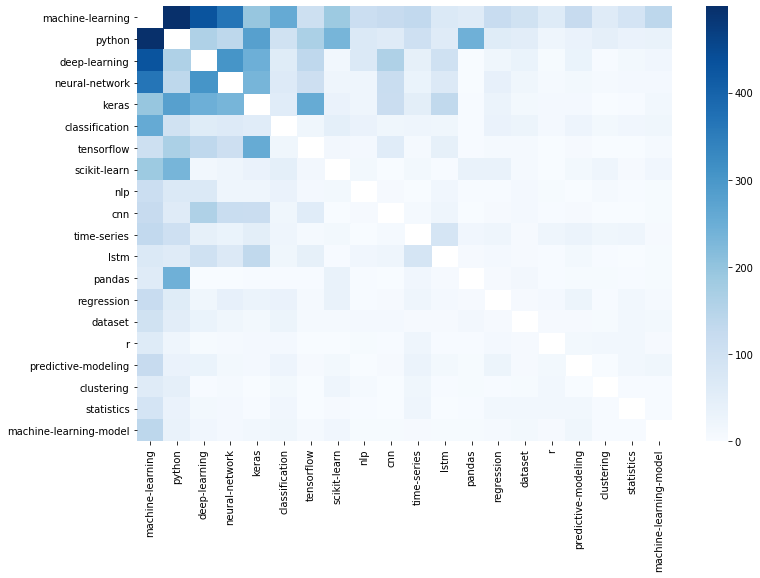

In [27]:
## create a heatmap
ax=plt.figure(figsize=(12,8))
ax=sns.heatmap(relations_most_used, cmap = 'Blues',)

By heatmap as bove, we can find:
* The most used tags also has strong relationships, especially for top 5 used tags (dark concentration in top-left corner on heatmap).However, this could simply be because each of these tags is used a lot, and so end up being used together a lot without possibly even having any strong relation between them
* Another shortcoming of this attempt is that it only looks at relations between pairs of tags and not between multiple groups of tags. For example, it could be the case that when used together, `dataset` and `scikit-learn` have a "strong" relation to `pandas`, but each by itself doesn't.

### Domain knowledge: Deep Learning - Just A Fad?

In general, someone with sufficient domain knowledge can tell that the most popular topic at the moment, is `deep learning`. if we want to be very specific, we can suggest the creation of Python content that uses `deep learning` for classification problems (and other variations of this suggestion). 

In this we will track the interest in deep learning across time. We will:

* Count how many deep learning questions are asked per time period.
* The total amount of questions per time period.
* How many deep learning questions there are relative to the total amount of questions per time period.

In [28]:
## read all_questions file
all_q=pd.read_csv('all_questions.csv', parse_dates=['CreationDate'])

## clean Tags column
all_q['Tags']=all_q['Tags'].str.replace('^<|>$','').str.split('><')
all_q.head()

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]"
1,45418,2019-02-12 00:50:39,[neural-network]
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]"
3,45426,2019-02-12 04:51:49,[keras]
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode..."


After that, we should determin which questions relate to `deep learning` tags. According to our results of `relations_most_used` dataframe, we can find the relateive tags are: `lstm, cnn, scikit-learn, tensorflow, keras, neural-network, deep-learning`. 

In [29]:
## create a deep learning relative list
dl_list=['deep-learning', 'keras', 'neural-network', 'cnn', 'ltsm', 'tensor-flow', 'scikit-learn']

## Classify tags as deep learning related
def deep_learning_class(tags):
    for tag in tags:
        if tag in dl_list:
            return 1
    else:
        return 0

all_q['DeepLearning']=all_q['Tags'].apply(deep_learning_class)
all_q.head(10)

,Id,CreationDate,Tags,DeepLearning
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1
1,45418,2019-02-12 00:50:39,[neural-network],1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0
3,45426,2019-02-12 04:51:49,[keras],1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0
5,45428,2019-02-12 05:43:18,[cnn],1
6,45430,2019-02-12 06:20:30,"[machine-learning, learning]",0
7,45431,2019-02-12 07:26:56,[machine-learning],0
8,45433,2019-02-12 08:56:23,"[python, keras, tensorflow, lstm]",1
9,45434,2019-02-12 09:09:01,"[neural-network, feature-selection, mlp]",1


We can find in `DeepLearning` column, if question has relationship with deep learning, assigns to 1. 

Now that we have classified posts as deep learning related, we will categorize posts by creation date. We will categorize posts by the year and quarter in which they were created. This will give us a more nuanced view of trends around deep learning over time as opposed to just categorizing by year and quarter, while still providing a big-picture sense of how interest has changed over time.

In [30]:
## Classify tags as year and quarter
import datetime as dt

year=all_q['CreationDate'].dt.year
month=all_q['CreationDate'].dt.month
quarter=(month-1)//3+1
all_q['Year&Quarter']=year.astype(str) + 'Q' +quarter.astype(str)
all_q.sample(10)

,Id,CreationDate,Tags,DeepLearning,Year&Quarter
4430,57276,2019-08-08 23:09:44,"[cross-validation, model-selection]",0,2019Q3
13541,22194,2017-08-11 21:53:51,[machine-learning],0,2017Q3
6316,58116,2019-08-24 09:38:04,"[deep-learning, classification, nlp]",1,2019Q3
13475,30724,2018-04-24 00:19:30,"[machine-learning, regression, prediction, geo...",0,2018Q2
2145,829,2014-07-24 06:26:07,"[bigdata, apache-hadoop]",0,2014Q3
19358,55016,2019-07-03 21:50:11,"[neural-network, gradient-descent, backpropaga...",1,2019Q3
16609,31991,2018-05-22 14:50:53,"[tensorflow, multiclass-classification, multil...",0,2018Q2
16060,53300,2019-06-06 05:24:10,"[dataset, image-classification, object-detecti...",0,2019Q2
19314,64982,2019-12-17 11:59:41,"[machine-learning, deep-learning, feature-sele...",1,2019Q4
4113,38854,2018-09-27 08:26:43,"[machine-learning, classification, clustering,...",0,2018Q3


In [31]:
## create pivot_table based on Year&Quarter
date_pivot=pd.pivot_table(all_q, index='Year&Quarter', aggfunc={'DeepLearning': ['size','sum']})
date_pivot.columns = ['TotalQuestions','DeepLearningQuestions']
date_pivot["DeepLearningRate"]=date_pivot['DeepLearningQuestions']/date_pivot['TotalQuestions']

date_pivot

,TotalQuestions,DeepLearningQuestions,DeepLearningRate
Year&Quarter,,,
2014Q2,157,9,0.057325
2014Q3,189,13,0.068783
2014Q4,216,21,0.097222
2015Q1,190,18,0.094737
2015Q2,284,28,0.098592
2015Q3,311,45,0.144695
2015Q4,382,64,0.167539
2016Q1,516,106,0.205426
2016Q2,518,107,0.206564


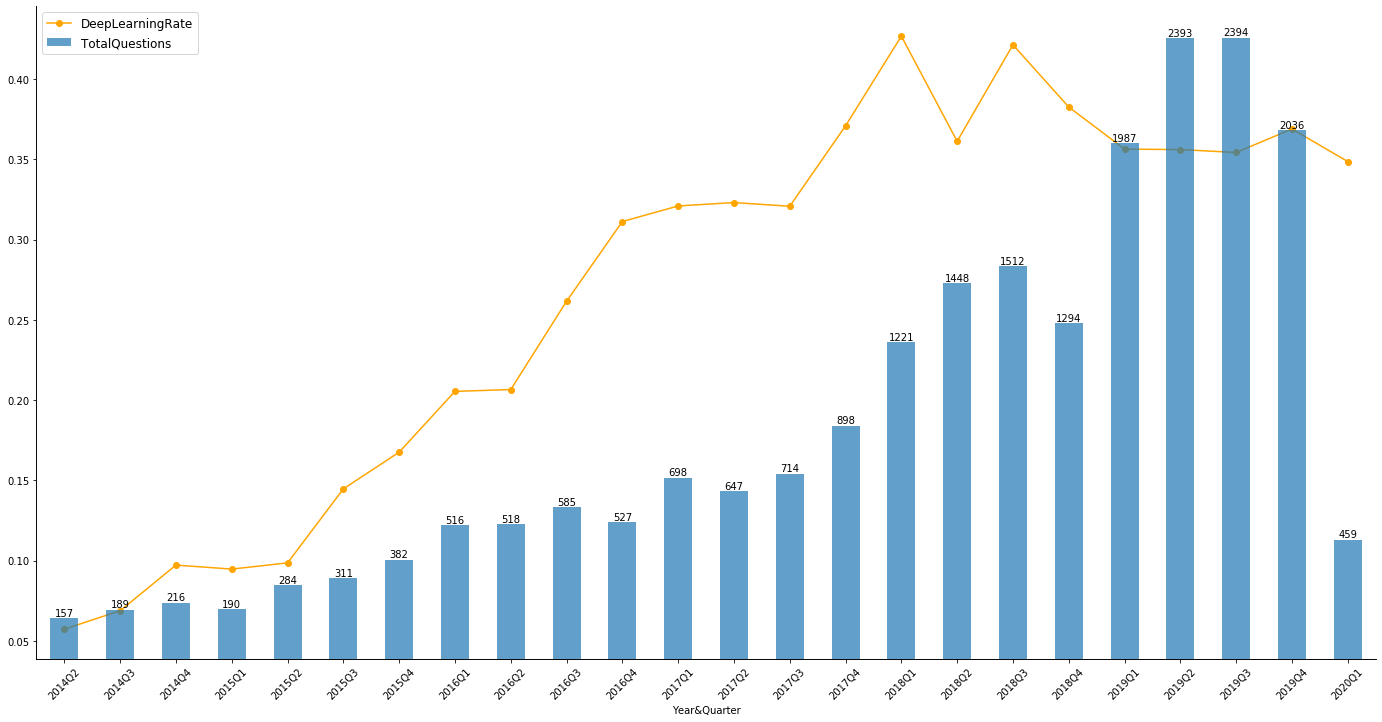

In [32]:
## visualization data

date_pivot.reset_index(inplace=True)
ax1 = date_pivot.plot(x="Year&Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = date_pivot.plot(x="Year&Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in date_pivot["TotalQuestions"].iteritems():
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

It seems that deep learning questions was a high-growth trend since 2014 and it looks like it is plateauing after 2019. Even through, deep learning is also relatively popular content in Data Science.

## Summary

According to data analysis shown above, the recommendations about which popular topic should be created are shown below:
* **DeepLearning**: Deep Learning has highly growth trend in recent years, especially from 2015-2018. Even it is plateauing after 2019, but the demand of deap learning still occupies 35%-40% of total data science questions. So, creating content and course on deep learning or relative topics like keras, neural networks is also a good strategy.
* **Python**: Python and it's relative content(Pandas, Numpy) are most viewd content. For beginners who study data analysis, Python has always been the preferred programming language recommended by various websites. And its powerful libraries attract more people‘s attention.
